Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform staƟsƟcal analysis, and generate visual insights to help the
business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the quesƟons step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
 Well-documented code and clear comments.
 Markdown explanaƟons for each step.
 Screenshots of the plots and outputs.

In [16]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use your roll number as the seed
roll_number = 102367005
np.random.seed(roll_number)


In [17]:
# Generate sales between 1000 and 5000 for 12 months and 4 product categories
sales_data = np.random.randint(1000, 5001, size=(12, 4))
sales_data


array([[3070, 2241, 2139, 1359],
       [3079, 1191, 3853, 4579],
       [4237, 3453, 1471, 4251],
       [3781, 1271, 2317, 2904],
       [2942, 1558, 3566, 2943],
       [1956, 1428, 2576, 3966],
       [1035, 3810, 2317, 2983],
       [1539, 2464, 3551, 2065],
       [4153, 2744, 2146, 2722],
       [3387, 2445, 1583, 4685],
       [3535, 2827, 4554, 1023],
       [1167, 2823, 3032, 3515]])

In [18]:
# Define month names and column names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
categories = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']

# Create DataFrame
df = pd.DataFrame(sales_data, columns=categories, index=months)
df


,Electronics,Clothing,Home & Kitchen,Sports
Jan,3070,2241,2139,1359
Feb,3079,1191,3853,4579
Mar,4237,3453,1471,4251
Apr,3781,1271,2317,2904
May,2942,1558,3566,2943
Jun,1956,1428,2576,3966
Jul,1035,3810,2317,2983
Aug,1539,2464,3551,2065
Sep,4153,2744,2146,2722
Oct,3387,2445,1583,4685


In [19]:
print(df.head())
print(df.describe())


     Electronics  Clothing  Home & Kitchen  Sports
Jan         3070      2241            2139    1359
Feb         3079      1191            3853    4579
Mar         4237      3453            1471    4251
Apr         3781      1271            2317    2904
May         2942      1558            3566    2943
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   2823.416667  2354.583333     2758.750000  3082.916667
std    1127.806758   851.374446      953.377167  1190.073295
min    1035.000000  1191.000000     1471.000000  1023.000000
25%    1851.750000  1525.500000     2144.250000  2557.750000
50%    3074.500000  2454.500000     2446.500000  2963.000000
75%    3596.500000  2824.000000     3554.750000  4037.250000
max    4237.000000  3810.000000     4554.000000  4685.000000


In [20]:
# Total per category
total_category = df.sum()

# Total per month
total_month = df.sum(axis=1)

print("Total Sales per Category:\n", total_category)
print("\nTotal Sales per Month:\n", total_month)


Total Sales per Category:
 Electronics       33881
Clothing          28255
Home & Kitchen    33105
Sports            36995
dtype: int64

Total Sales per Month:
 Jan     8809
Feb    12702
Mar    13412
Apr    10273
May    11009
Jun     9926
Jul    10145
Aug     9619
Sep    11765
Oct    12100
Nov    11939
Dec    10537
dtype: int64


In [21]:
avg_growth = df.pct_change().mean()
print("Average Sales Growth (%):\n", avg_growth * 100)


Average Sales Growth (%):
 Electronics        5.621284
Clothing          21.958504
Home & Kitchen    21.238910
Sports            40.727042
dtype: float64


In [22]:
df['Total Sales'] = df.sum(axis=1)
df['Growth Rate (%)'] = df['Total Sales'].pct_change() * 100
df


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate (%)
Jan,3070,2241,2139,1359,8809,NaN
Feb,3079,1191,3853,4579,12702,44.193439
Mar,4237,3453,1471,4251,13412,5.589671
Apr,3781,1271,2317,2904,10273,-23.404414
May,2942,1558,3566,2943,11009,7.164412
Jun,1956,1428,2576,3966,9926,-9.837406
Jul,1035,3810,2317,2983,10145,2.206327
Aug,1539,2464,3551,2065,9619,-5.184820
Sep,4153,2744,2146,2722,11765,22.310011
Oct,3387,2445,1583,4685,12100,2.847429


In [23]:
# Example for even roll number
if roll_number % 2 == 0:
    df['Electronics'] *= 0.9  # Apply 10% discount
else:
    df['Clothing'] *= 0.85  # Apply 15% discount

df


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate (%)
Jan,3070,1904.85,2139,1359,8809,NaN
Feb,3079,1012.35,3853,4579,12702,44.193439
Mar,4237,2935.05,1471,4251,13412,5.589671
Apr,3781,1080.35,2317,2904,10273,-23.404414
May,2942,1324.30,3566,2943,11009,7.164412
Jun,1956,1213.80,2576,3966,9926,-9.837406
Jul,1035,3238.50,2317,2983,10145,2.206327
Aug,1539,2094.40,3551,2065,9619,-5.184820
Sep,4153,2332.40,2146,2722,11765,22.310011
Oct,3387,2078.25,1583,4685,12100,2.847429


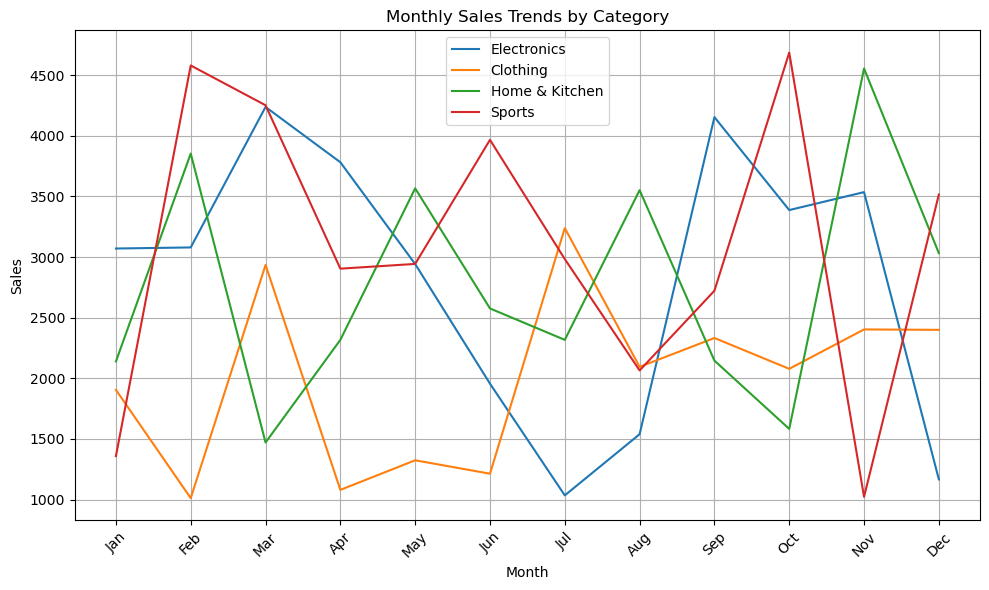

In [24]:
plt.figure(figsize=(10, 6))
for cat in categories:
    sns.lineplot(x=months, y=df[cat], label=cat)

plt.title('Monthly Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


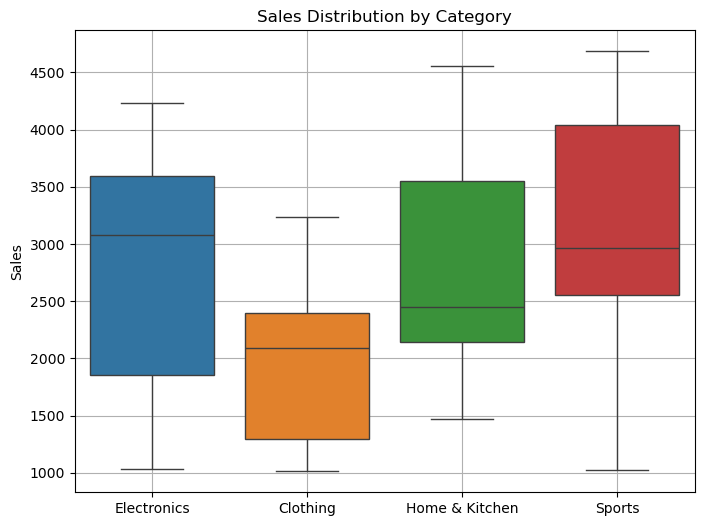

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[categories])
plt.title('Sales Distribution by Category')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [26]:
array = np.array([[1, -2, 3], [-4, 5, -6]])

# i. Absolute Value
abs_array = np.abs(array)

# ii. Percentiles
flat = array.flatten()
percentiles_flat = np.percentile(flat, [25, 50, 75])

percentile_col = np.percentile(array, [25, 50, 75], axis=0)
percentile_row = np.percentile(array, [25, 50, 75], axis=1)

# iii. Mean, Median, Std
mean_flat = np.mean(flat)
median_flat = np.median(flat)
std_flat = np.std(flat)

mean_col = np.mean(array, axis=0)
median_col = np.median(array, axis=0)
std_col = np.std(array, axis=0)

mean_row = np.mean(array, axis=1)
median_row = np.median(array, axis=1)
std_row = np.std(array, axis=1)


In [27]:
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

floor_vals = np.floor(a)
ceil_vals = np.ceil(a)
trunc_vals = np.trunc(a)
rounded_vals = np.round(a)


In [28]:
lst = [1, 2, 3, 4]
temp = lst[1]
lst[1] = lst[2]
lst[2] = temp
print(lst)


[1, 3, 2, 4]


In [29]:
s = {10, 20, 30, 40}
lst = list(s)

# Swap index 1 and 2
lst[1], lst[2] = lst[2], lst[1]

# Convert back to set
s = set(lst)
print(s)


{40, 10, 20, 30}
